# Natural Language Processing Checkpoint
This checkpoint is designed to test your understanding of the content from the Text Classification Cumulative Lab.

Specifically, this will cover:

- Preprocessing and exploring text data using `nltk`
- Vectorizing text data using a bag-of-words approach
- Fitting machine learning models using vectorized text data

### Data Understanding

In this repository under the file path `/movie_descriptions.csv` there is a CSV file containing the titles, genres, and descriptions for 5,000 films pulled from [IMDb](https://www.kaggle.com/hijest/genre-classification-dataset-imdb).

**The features of interest for this analysis will be:**

1. `desc`: The description of the film, which we will explore and then use as the features of our model
2. `genre`: The target for our predictive model

In [1]:
# Run this cell without changes
import pandas as pd

# Import the data
data = pd.read_csv('movie_descriptions.csv')

# Output a sample
data = data.sample(1500, random_state=100)
data.head()

,id,title,genre,desc
789,31370,Do You Believe? (2007),documentary,"Do you believe?"" digs deep into our spiritual..."
2507,25529,The House That Jack Broke (2013),drama,"Early one morning, two FBI agents, Portman an..."
2376,5405,Children of Peace (2016),documentary,The Bosnian War was an international armed co...
1378,49949,Hwioribaram (2009),drama,During winter vacation of their sophomore yea...
598,21445,Gui pian wang zhi zai xian xiong bang (1999),horror,"At a Hong Kong dormitory, the cook's little g..."


In [2]:
# Run this cell without changes
data.genre.value_counts()

 documentary     495
 drama           489
 comedy          284
 horror           82
 thriller         56
 action           49
 western          45
Name: genre, dtype: int64

### Requirements

1. Initialize tokenizer and stemmer objects to prepare for text preprocessing
2. Write a function that implements standard "bag of words" text preprocessing
3. Initialize and fit a `CountVectorizer` from `sklearn`
3. Vectorize data using `CountVectorizer`
4. Fit a decision tree classifier on vectorized text data

## 1) Initialize Tokenizer, Stemmer, and Stopwords Objects

In our exploratory text analysis, we will:

* Standardize case
* Tokenize (split text into words)
* Remove stopwords
* Stem words

Three of those steps require that we import some functionality from `nltk`. In the cell below, create:

* An instance of `RegexpTokenizer` ([documentation here](https://www.nltk.org/api/nltk.tokenize.regexp.html#module-nltk.tokenize.regexp)) called `tokenizer`
  * The regex pattern should select all words with three or more characters. You can use the pattern `r"(?u)\w{3,}"`
* A list of stopwords (documentation [here](https://www.nltk.org/api/nltk.corpus.html#module-nltk.corpus) and [here](https://www.nltk.org/nltk_data/)) called `stopwords_list`
* An instance of `PorterStemmer` ([documentation here](https://www.nltk.org/api/nltk.stem.porter.html)) called `stemmer`

In [3]:
!pip install nltk

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [6]:
# Run this line in a new cell if nltk isn't working
# !pip install nltk

# Import necessary libraries
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



# Create an instance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()


text = "The last time we watched the Mmovie it was interesting, this time I was a bit 8bored."
tokens = tokenizer.tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords_list]
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

print("Original Tokens:", tokens)
print("Filtered Tokens (without stopwords):", filtered_tokens)
print("Stemmed Tokens:", stemmed_tokens)


Original Tokens: ['The', 'last', 'time', 'watched', 'the', 'Mmovie', 'was', 'interesting', 'this', 'time', 'was', 'bit', '8bored']
Filtered Tokens (without stopwords): ['last', 'time', 'watched', 'Mmovie', 'interesting', 'time', 'bit', '8bored']
Stemmed Tokens: ['last', 'time', 'watch', 'mmovi', 'interest', 'time', 'bit', '8bore']


In [7]:
# Checking that variables are no longer None
assert tokenizer
assert stopwords_list
assert stemmer

# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 2) Write a Function That Implements Standard Text Preprocessing

In the cell below, complete the `preprocess_text` function so the inputted text is returned lower cased, tokenized, stopwords removed, and stemmed.

For example, if you input the text

```
This is an example sentence for preprocessing.
```

The result of `preprocess_text` should be this list of strings:

```python
['exampl', 'sentenc', 'preprocess']
```

In [8]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()

    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(text)

    # Remove stopwords using `stopwords_list`
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_list]

    # Stem the tokenized text using `stemmer`
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Return the preprocessed text
    return stemmed_tokens

# Example usage:
preprocessed_text = preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)
print("Preprocessed Text:", preprocessed_text)


Preprocessed Text: ['exampl', 'sentenc', 'preprocess']


In [9]:
from types import FunctionType

assert type(preprocess_text) == FunctionType
assert type(preprocess_text('Example text', tokenizer, stopwords_list, stemmer)) == list
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

Now that the function has been created, use it to preprocess the entire dataset:

In [10]:
from google.colab import files

uploaded = files.upload()

Saving movie_descriptions.csv to movie_descriptions (1).csv


In [11]:
import numpy as np
import pandas as pd

In [12]:
#Import data
data = pd.read_csv('movie_descriptions.csv')
data

,id,title,genre,desc
0,48477,Burning Man (2007),documentary,Every year during the week of Labor Day Weeke...
1,45172,Questioning Faith: Confessions of a Seminaria...,documentary,"When Macky Alston's fellow seminarian, Alan S..."
2,423,The Young Doctors (1961),drama,Two pathologists -- a veteran department head...
3,9588,Casanova (2015),drama,"Exiled from his beloved Venice, Giacomo Casan..."
4,38150,"""Front of House"" (2014)",comedy,"Rob, Hillary and Liam are three friends whose..."
...,...,...,...,...
4995,33622,El cuerno de la abundancia (2008),comedy,"In a poor rural Cuban town, Bernardo's large ..."
4996,16681,"""Body & Soul"" (2002)",drama,"Dr. Rachel Griffen returns from the Far East,..."
4997,44855,Beasts of the Bible (2010),documentary,The Bible is full of strange and fantastic cr...
4998,29043,Prepared to Serve: The U.S. Naval Academy in ...,documentary,"In June 1964, members of the Class of 1968 re..."


In [13]:
# Run this cell without changes
# (This may take a while due to nested loops)
text_data = data.desc.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
text_data

0       [everi, year, week, labor, day, weekend, ten, ...
1       [macki, alston, fellow, seminarian, alan, smit...
2       [two, pathologist, veteran, depart, head, fred...
3       [exil, belov, venic, giacomo, casanova, flee, ...
4       [rob, hillari, liam, three, friend, whose, dif...
                              ...                        
4995    [poor, rural, cuban, town, bernardo, larg, ext...
4996    [rachel, griffen, return, far, east, plan, inc...
4997    [bibl, full, strang, fantast, creatur, legenda...
4998    [june, 1964, member, class, 1968, report, unit...
4999    [sam, missi, wagner, love, motion, mediocr, ma...
Name: desc, Length: 5000, dtype: object

In [14]:
# Run this cell without changes
data["preprocessed_text"] = text_data
data

,id,title,genre,desc,preprocessed_text
0,48477,Burning Man (2007),documentary,Every year during the week of Labor Day Weeke...,"[everi, year, week, labor, day, weekend, ten, ..."
1,45172,Questioning Faith: Confessions of a Seminaria...,documentary,"When Macky Alston's fellow seminarian, Alan S...","[macki, alston, fellow, seminarian, alan, smit..."
2,423,The Young Doctors (1961),drama,Two pathologists -- a veteran department head...,"[two, pathologist, veteran, depart, head, fred..."
3,9588,Casanova (2015),drama,"Exiled from his beloved Venice, Giacomo Casan...","[exil, belov, venic, giacomo, casanova, flee, ..."
4,38150,"""Front of House"" (2014)",comedy,"Rob, Hillary and Liam are three friends whose...","[rob, hillari, liam, three, friend, whose, dif..."
...,...,...,...,...,...
4995,33622,El cuerno de la abundancia (2008),comedy,"In a poor rural Cuban town, Bernardo's large ...","[poor, rural, cuban, town, bernardo, larg, ext..."
4996,16681,"""Body & Soul"" (2002)",drama,"Dr. Rachel Griffen returns from the Far East,...","[rachel, griffen, return, far, east, plan, inc..."
4997,44855,Beasts of the Bible (2010),documentary,The Bible is full of strange and fantastic cr...,"[bibl, full, strang, fantast, creatur, legenda..."
4998,29043,Prepared to Serve: The U.S. Naval Academy in ...,documentary,"In June 1964, members of the Class of 1968 re...","[june, 1964, member, class, 1968, report, unit..."


Now let's take a look at the top ten most frequent words for each genre.

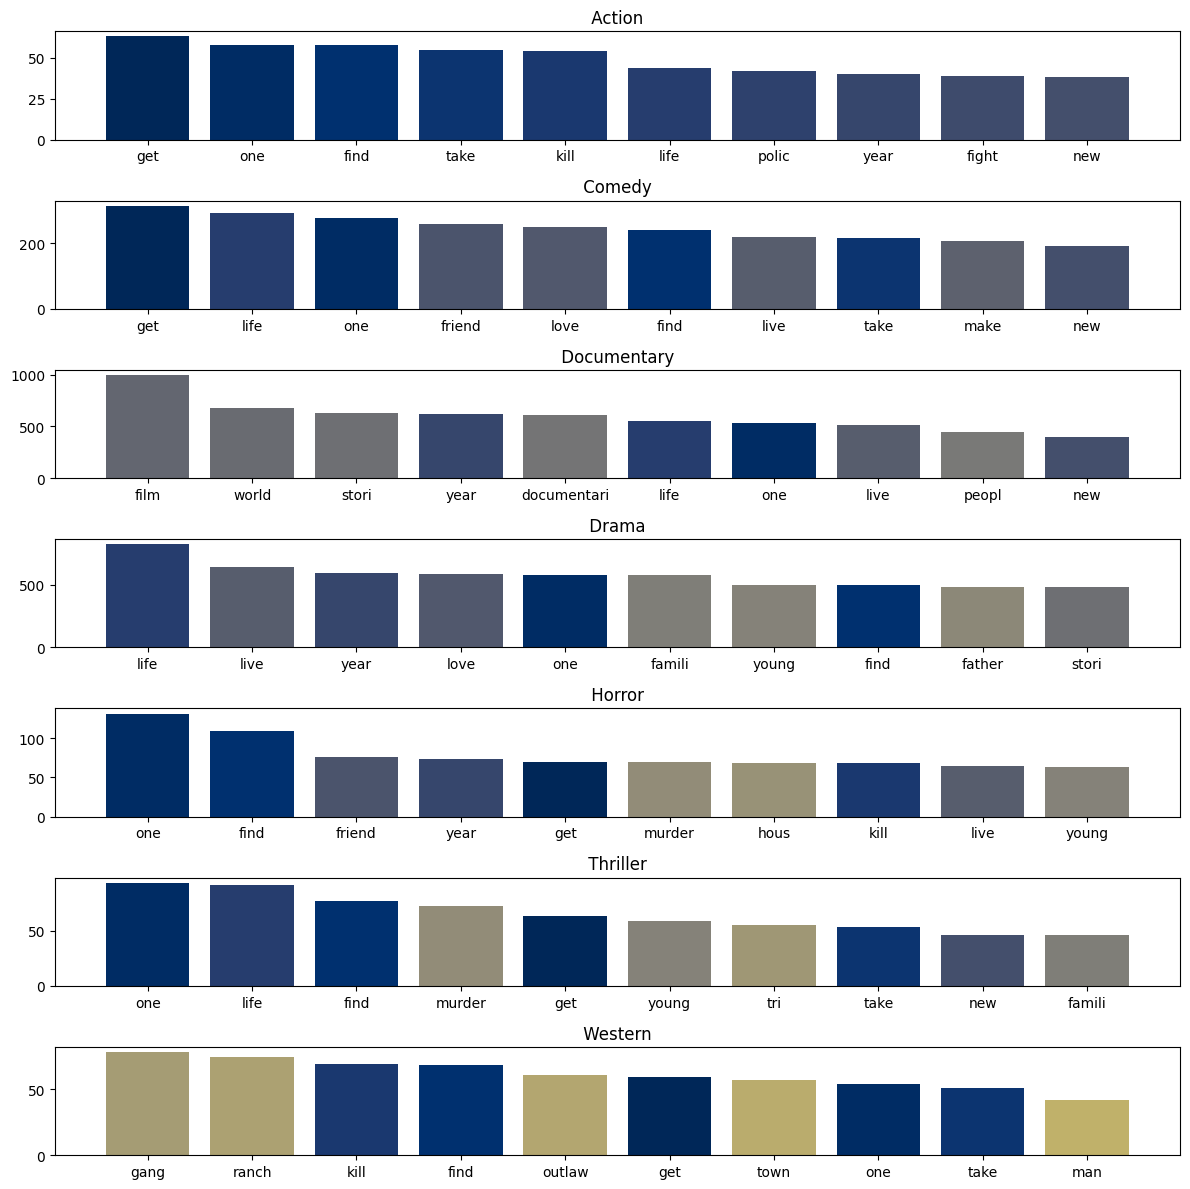

In [15]:
# Run this cell without changes
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=7, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_genre = [y for _, y in data.groupby('genre', as_index=False)]
for idx, genre_df in enumerate(data_by_genre):
    # Find top 10 words in this genre
    all_words_in_genre = genre_df.preprocessed_text.explode()
    top_10 = all_words_in_genre.value_counts()[:10]

    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])

    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(genre_df.iloc[0].genre.title())

fig.tight_layout()

## 3) Fit a Count Vectorizer

Now that we have explored the data some, let's prepare it for modeling.

Before we fit a vectorizer to the data, we need to convert the list of tokens for each document back to a string datatype and create a train test split.

In [16]:
# Run this cell without changes
from sklearn.model_selection import train_test_split

# Convert token lists to strings
data["joined_preprocessed_text"] = data["preprocessed_text"].str.join(" ")

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(
    data["joined_preprocessed_text"], data.genre, test_size=0.3, random_state=2021)

X_train

2636    lose barroom brawl unconsci gibson kendal put ...
1465    hope cash final stage found footag phenomenon ...
1546    villaviciosa lado peac town stuck time live ex...
4206    stori weymouth import harbour sinc 14th centur...
4375    junki pitch black comedi two heavili addict dr...
                              ...                        
3934    kati young teenag girl fast track short life d...
2669    documentari film takashi nagas former interpre...
1152    live immigr usa year azat fli kyrgyzstan famil...
3413    discourag card life felt hank jim belushi man ...
1140    movi compel love stori hidden underneath stres...
Name: joined_preprocessed_text, Length: 3500, dtype: object

**In the cell below, create a CountVectorizer instance ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)) with default arguments, called `vectorizer`, and fit it to the training data.**

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a `vectorizer` instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

In [18]:
assert vectorizer
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

## 4) Vectorize the Data

In the cell below, vectorize the training and test datasets using the fitted count vectorizer.

In [19]:
# Vectorize the training data
X_train_vectorized = vectorizer.transform(X_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
from scipy.sparse.csr import csr_matrix
assert type(X_train_vectorized) == csr_matrix
assert type(X_test_vectorized) == csr_matrix
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

<ipython-input-20-29b06d833247>:1: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix


## 5) Fit a Decision Tree Model

In the cell below,

- Create an instance of `sklearn`'s `DecisionTreeClassifier` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), using default arguments, with the variable name `dt`
- Fit the model to the vectorized training data

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize `dt`
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [22]:
assert dt
# PUT ALL WORK FOR THE ABOVE QUESTION ABOVE THIS CELL
# THIS UNALTERABLE CELL CONTAINS HIDDEN TESTS

The following code will now evaluate our model on the test data:

In [23]:
pip install --upgrade scikit-learn

In [24]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(dt, X_test_vectorized, y_test, ax=ax, cmap="cividis");

ImportError: ignored